In [1]:
import re
import pickle as pk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [3]:
df = pd.read_csv("../../data/Movie Dataset.csv")

In [4]:
df.head()

,text,label
0,I love sci-fi and am willing to put up with a ...,0
1,"Worth the entertainment value of a rental, esp...",0
2,its a totally average film with a few semi-alr...,0
3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,"First off let me say, If you haven't enjoyed a...",0


In [5]:
df

,text,label
0,I love sci-fi and am willing to put up with a ...,0
1,"Worth the entertainment value of a rental, esp...",0
2,its a totally average film with a few semi-alr...,0
3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,"First off let me say, If you haven't enjoyed a...",0
...,...,...
24995,Just got around to seeing Monster Man yesterda...,1
24996,I got this as part of a competition prize. I w...,1
24997,I got Monster Man in a box set of three films ...,1
24998,"Five minutes in, i started to feel how naff th...",1


In [6]:
df = df.drop_duplicates().copy()

In [7]:
#test cleaning
def transform_text(text):
    wt = WordNetLemmatizer()
    corpus = []
    patten = re.compile('<.*?>')
    text = patten.sub(r' ',text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [wt.lemmatize(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    return text

In [8]:
df['transform_text'] = df['text'].apply(transform_text)

In [9]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

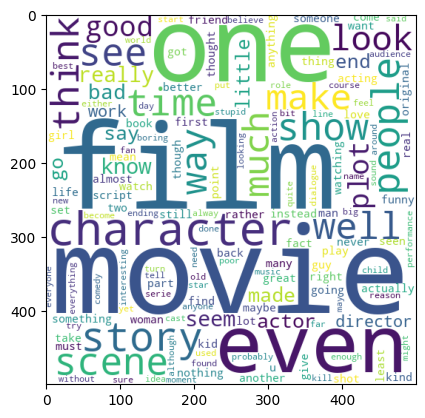

In [11]:
wc = WordCloud(width=500,height = 500,min_font_size=10,background_color='white')
#Used to Cleck Most Negative words
span_wc = wc.generate(df[df['label']==0]['transform_text'].str.cat(sep=" "))
plt.imshow(span_wc)

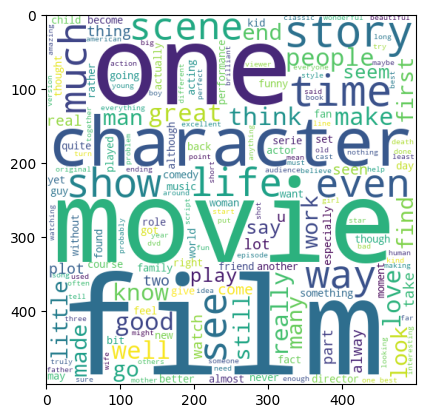

In [13]:
#Used to Cleck Most Positive words
span_wc = wc.generate(df[df['label']==1]['transform_text'].str.cat(sep=" "))
plt.imshow(span_wc)

In [14]:
df.shape

(24801, 3)

In [15]:
# tfidf = TfidfVectorizer()
cv = CountVectorizer(max_features=8000)

In [16]:
df

,text,label,transform_text
0,I love sci-fi and am willing to put up with a ...,0,love sci fi willing put lot sci fi movie tv us...
1,"Worth the entertainment value of a rental, esp...",0,worth entertainment value rental especially li...
2,its a totally average film with a few semi-alr...,0,totally average film semi alright action seque...
3,STAR RATING: ***** Saturday Night **** Friday ...,0,star rating saturday night friday night friday...
4,"First off let me say, If you haven't enjoyed a...",0,first let say enjoyed van damme movie since bl...
...,...,...,...
24995,Just got around to seeing Monster Man yesterda...,1,got around seeing monster man yesterday long w...
24996,I got this as part of a competition prize. I w...,1,got part competition prize watched really expe...
24997,I got Monster Man in a box set of three films ...,1,got monster man box set three film mainly want...
24998,"Five minutes in, i started to feel how naff th...",1,five minute started feel naff looking got comp...


In [17]:
X = cv.fit_transform(df['transform_text']).toarray()

In [18]:
print(X)
print(X.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(24801, 8000)


In [19]:
y = df['label'].values

In [20]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
#train model
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

cfid = MultinomialNB().fit(x_train,y_train)

In [31]:
y_pred = cfid.predict(x_test)

In [32]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8705906067325136
[[2221  286]
 [ 356 2098]]
0.8800335570469798


In [34]:
pk.dump(cv,open('../models/vectorizer.pkl','wb'))
pk.dump(cfid,open('../models/model.pkl','wb'))